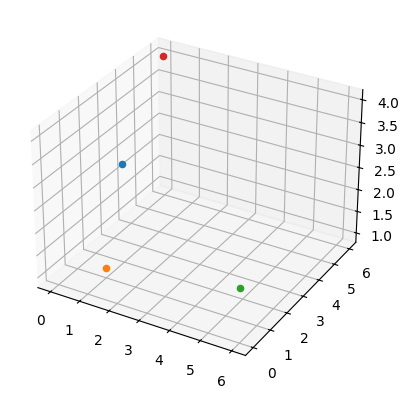

(array([1, 2, 3]), array([1, 1, 1]))
Расстояние Евклида 2.23606797749979
Расстояние Евклида 5.000000000000001
Расстояние Чебышева 2.0
Расстояние Хемминга 3.0

(array([1, 2, 3]), array([6, 0, 2]))
Расстояние Евклида 5.477225575051661
Расстояние Евклида 30.0
Расстояние Чебышева 5.0
Расстояние Хемминга 8.0

(array([1, 2, 3]), array([0, 6, 4]))
Расстояние Евклида 4.242640687119285
Расстояние Евклида 17.999999999999996
Расстояние Чебышева 4.0
Расстояние Хемминга 6.0

(array([1, 1, 1]), array([6, 0, 2]))
Расстояние Евклида 5.196152422706632
Расстояние Евклида 27.0
Расстояние Чебышева 5.0
Расстояние Хемминга 7.0

(array([1, 1, 1]), array([0, 6, 4]))
Расстояние Евклида 5.916079783099616
Расстояние Евклида 35.0
Расстояние Чебышева 5.0
Расстояние Хемминга 9.0

(array([6, 0, 2]), array([0, 6, 4]))
Расстояние Евклида 8.717797887081348
Расстояние Евклида 76.00000000000001
Расстояние Чебышева 6.0
Расстояние Хемминга 14.0



In [ ]:
"""
№ 1.3.1 Задание
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.
"""
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

a = np.array([1,2,3])
b = np.array([1,1,1])
c = np.array([6,0,2])
d = np.array([0,6,4])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for p in [a,b,c,d]:
    ax.scatter(*p)
plt.show()

for c in combinations([a,b,c,d],r=2):
    print(c)
    print("Расстояние Евклида", np.linalg.norm(c[0]-c[1]))
    print("Расстояние Евклида",np.linalg.norm(c[0]-c[1])**2)
    print("Расстояние Чебышева",np.linalg.norm(c[0]-c[1],ord=np.inf))
    print("Расстояние Хемминга",np.linalg.norm(c[0]-c[1],ord=1))
    print()

In [3]:
"""
1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.
"""
import numpy as np

Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


Ближайших соседей: 1 | Тестовая выборка: 20.0%
Accuracy: 0.967
Количество ошибок: 1/30


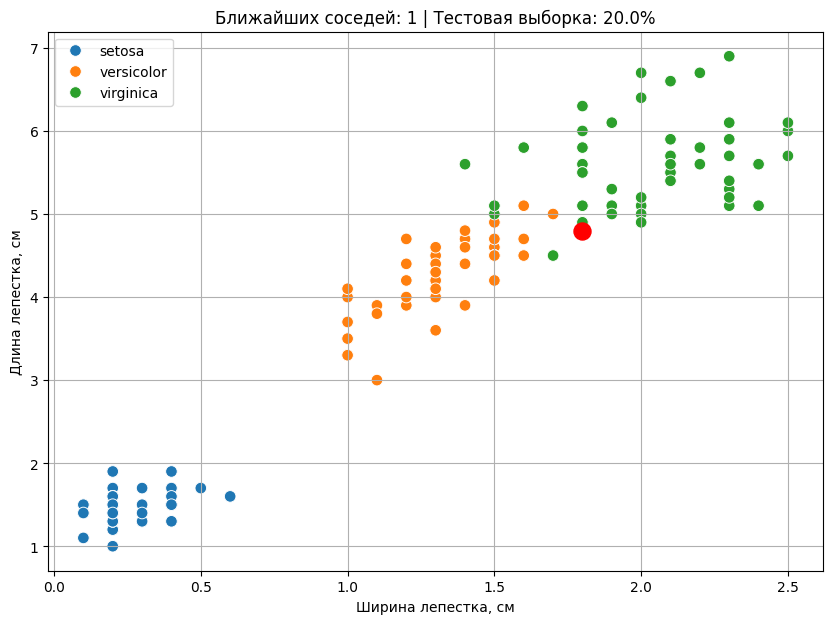

Ближайших соседей: 1 | Тестовая выборка: 15.0%
Accuracy: 1.000
Количество ошибок: 0/23


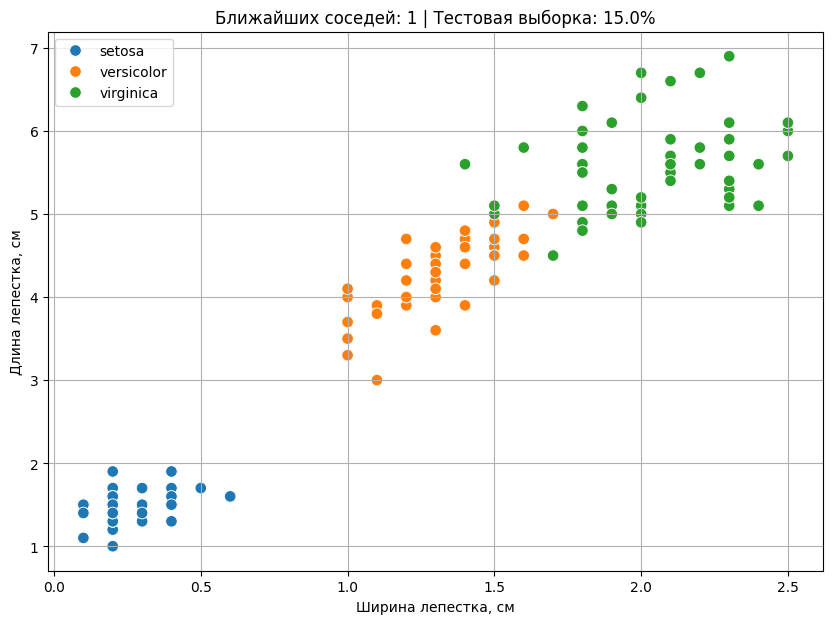

Ближайших соседей: 5 | Тестовая выборка: 20.0%
Accuracy: 0.967
Количество ошибок: 1/30


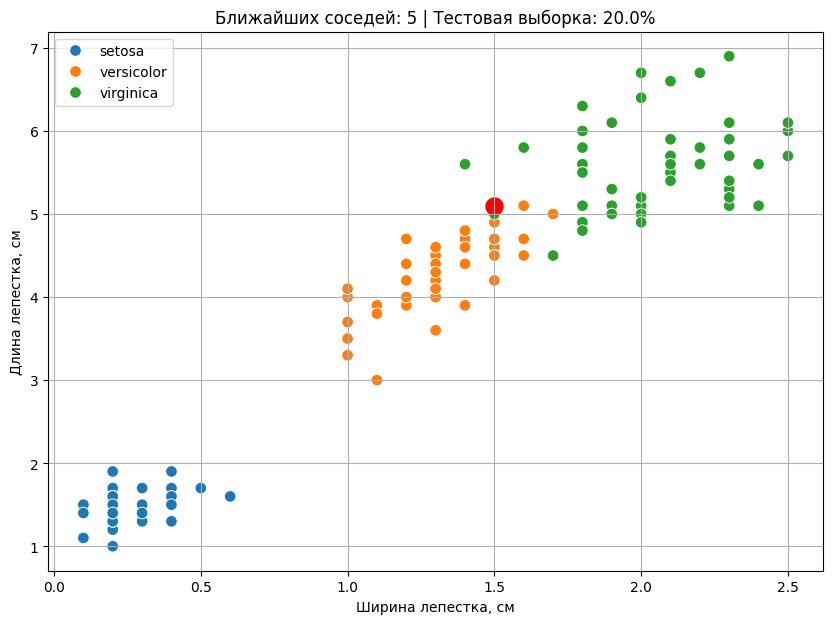

Ближайших соседей: 5 | Тестовая выборка: 15.0%
Accuracy: 1.000
Количество ошибок: 0/23


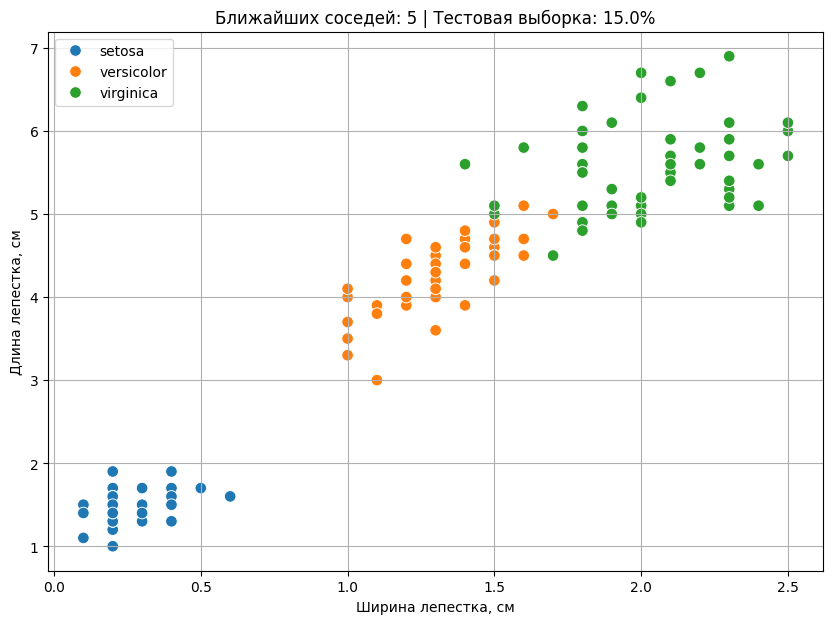

Ближайших соседей: 10 | Тестовая выборка: 20.0%
Accuracy: 1.000
Количество ошибок: 0/30


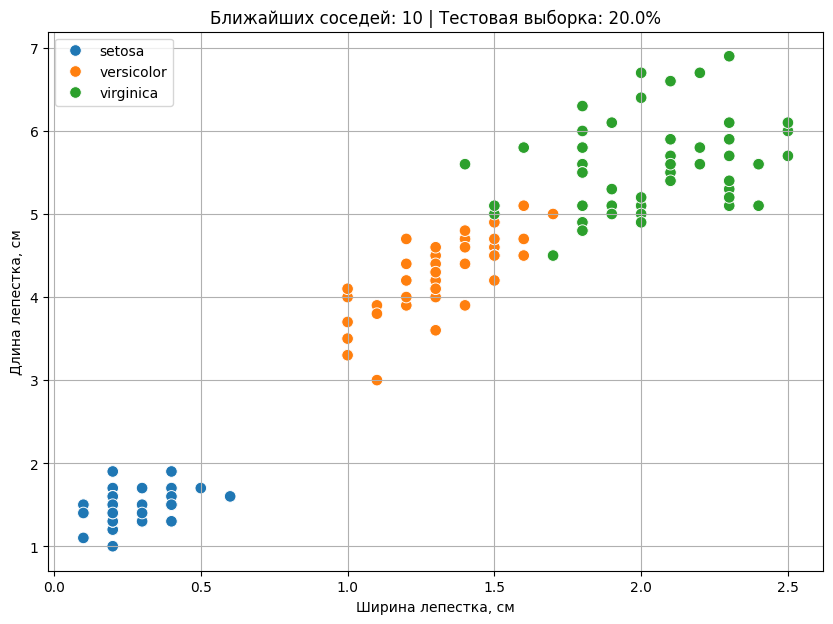

Ближайших соседей: 10 | Тестовая выборка: 15.0%
Accuracy: 0.957
Количество ошибок: 1/23


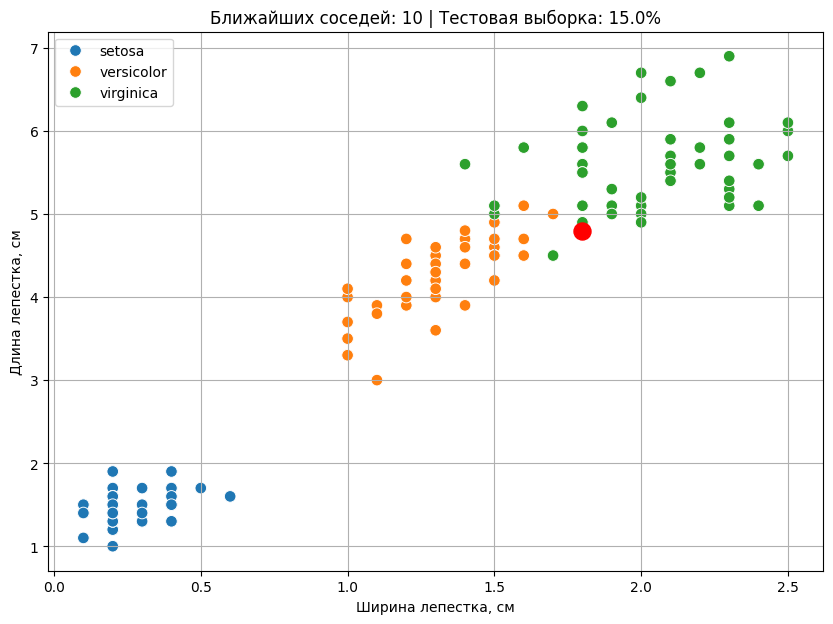

In [ ]:
"""
2.3.1
Для  предыдущего  примера  поэкспериментируйте  с  параметрами
классификатора:
1.  Установите другое количество ближайших соседей (k = 1, 5, 10).
2.  Установите размер тестовой выборки 15% от всего датасета.
3.  Постройте графики и оцените качество моделей, проанализируйте
результаты
"""
import seaborn as sns
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset('iris')

for input_params in product([1, 5, 10], [0.20, 0.15]):
    k, test_size = input_params

    X_train, X_test, y_train, y_test = train_test_split(
        iris.iloc[:, :-1],  # признаки
        iris.iloc[:, -1],   # целевая переменная
        test_size=test_size,
    )

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 7))+3
    
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel('Ширина лепестка, см')
    plt.ylabel('Длина лепестка, см')
    plt.title(f'Ближайших соседей: {k} | Тестовая выборка: {test_size*100}%')
    plt.legend(loc=2)
    plt.grid()

    errors_count = 0
    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
            errors_count += 1

    accuracy = accuracy_score(y_test, y_pred)

    print("=" * 50)
    print(f"Ближайших соседей: {k} | Тестовая выборка: {test_size*100}%")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Количество ошибок: {errors_count}/{len(y_test)}")
    print("=" * 50)
    plt.show()

In [10]:
"""
3.3.2
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.
"""
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

eye_color_data = [
    {
        "голубой": 25,
        "зеленый": 12,
        "серо-голубой": 18,
        "серо-зеленый": 10,
        "коричневый": 20,
        "серый": 8,
        "фисташковый": 7
    },
    {
        "голубой": 22,
        "зеленый": 15,
        "серо-голубой": 16,
        "серо-зеленый": 9,
        "коричневый": 23,
        "серый": 10,
        "фисташковый": 5
    },
    {
        "голубой": 28,
        "зеленый": 10,
        "серо-голубой": 14,
        "серо-зеленый": 11,
        "коричневый": 19,
        "серый": 12,
        "фисташковый": 6
    },
    {
        "голубой": 20,
        "зеленый": 14,
        "серо-голубой": 17,
        "серо-зеленый": 8,
        "коричневый": 25,
        "серый": 9,
        "фисташковый": 7
    },
    {
        "голубой": 26,
        "зеленый": 11,
        "серо-голубой": 15,
        "серо-зеленый": 12,
        "коричневый": 21,
        "серый": 7,
        "фисташковый": 8
    }
]

dictvectorizer = DictVectorizer(sparse=False)
features = np.array(dictvectorizer.fit_transform(eye_color_data))
feature_names = np.array(dictvectorizer.get_feature_names_out())

df = pd.DataFrame(features, columns=feature_names)
print("Матрица признаков:\n")
print(df.to_string())

Матрица признаков:

   голубой  зеленый  коричневый  серо-голубой  серо-зеленый  серый  фисташковый
0     25.0     12.0        20.0          18.0          10.0    8.0          7.0
1     22.0     15.0        23.0          16.0           9.0   10.0          5.0
2     28.0     10.0        19.0          14.0          11.0   12.0          6.0
3     20.0     14.0        25.0          17.0           8.0    9.0          7.0
4     26.0     11.0        21.0          15.0          12.0    7.0          8.0
